# Hypothesis Testing
Susan Shin


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.9.3'

In [42]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Q1. Do smokers have higher insurance charges than non-smokers?

* State your Null Hypothesis and Alternative Hypothesis
    * This question's null hypothesis would be that smoking has no effect on insurance compared to non-smokers.
    * Alternative hypothesis would be that smoking has a significant insurance charges.
* Select the correct test according to the data type and number of samples
    * This data is numeric with two samples.
    * The test we use will be the 2 Sample T-Test

In [44]:
## save list of columns needed for each group
needed_cols = ['smoker', 'charges']
df[needed_cols].head()

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520


In [45]:
smoker_yes = df.loc[df['smoker'] == 'yes', needed_cols]
smoker_yes.head()

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768


In [46]:
smoker_no = df.loc[df['smoker'] == 'no', needed_cols]
smoker_no.head()

,smoker,charges
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
5,no,3756.62160


## Testing Assumptions

### Outliers

In [47]:
smoker_group = smoker_yes['charges']
non_smoker_group = smoker_no['charges']

In [48]:
smoker_outliers = np.abs(stats.zscore(smoker_group))>3

## how many outliers?
smoker_outliers.value_counts()

False    274
Name: charges, dtype: int64

In [49]:
non_smoker_outliers = np.abs(stats.zscore(non_smoker_group))>3

## how many outliers?
non_smoker_outliers.value_counts()

False    1040
True       24
Name: charges, dtype: int64

In [50]:
non_smoker_group = non_smoker_group[~non_smoker_outliers]

In [51]:
len(non_smoker_group)

1040

Smoker outliers have been removed.

### Normality Testing

In [52]:
stats.normaltest(smoker_group)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [53]:
stats.normaltest(non_smoker_group)

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

Normality test failed for both groups, however each group has greater than 15 samples. Due to this, normality tests have been passed.

### Testing Equal Variance

In [54]:
results = stats.levene(smoker_group, non_smoker_group)
results

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

Test for equal variance has failed, so will apply equal_var = False to final test.

### Final Hypothesis Test

In [55]:
stats.ttest_ind(smoker_group, non_smoker_group, equal_var = False)

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

### Final Conclusion

Final test's pvalue is less than alpha (5%) so we will reject the null hypothesis.

This means that smoking has a significant impact on insurance charges.

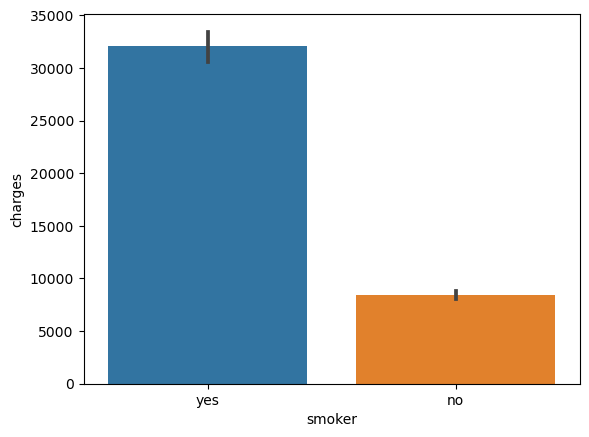

In [56]:
sns.barplot(data = df, x = "smoker", y = "charges");

# Q2. Are men more likely to smoke than women?

* State your Null Hypothesis and Alternative Hypothesis
    * This question's null hypothesis is that there is no significant affect that sex has on the likelyhood to be a smoker.
    * Alternative hypothesis would be that smoking is significantly affected by sex.
* Select the correct test according to the data type and number of samples
    * This data is categorical with two samples.
    * The test we use will be the Chi-Square

### Final Test

In [108]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [109]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [110]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

Pvalue is less than alpha in this test. This means we will reject the null hypothesis.

This means that the likelyhood of smoking is significantly impacted by sex.

<AxesSubplot: xlabel='smoker', ylabel='Count'>

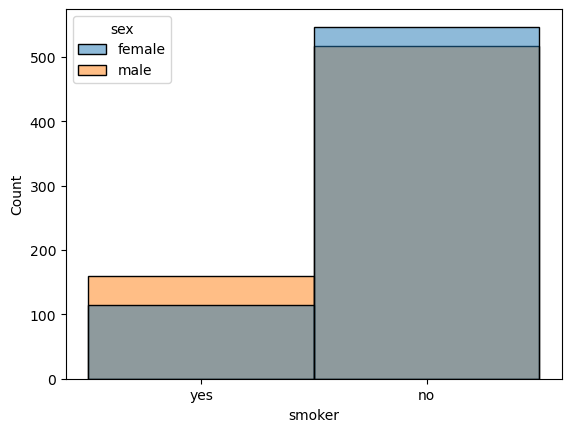

In [124]:
sns.histplot(data = df, x = "smoker", hue = "sex")

# Q3. Do different regions have different charges, on average?

* State your Null Hypothesis and Alternative Hypothesis
    * This question's null hypothesis would be that there is no significant difference in charges between regions.
    * Alternative hypothesis would be that regionality has a significant affect on charges.
* Select the correct test according to the data type and number of samples
    * This data is numeric with four samples.
    * The test we use will be the ANOVA test.

In [62]:
## save list of columns needed for each group
needed_cols = ['region', 'charges']
df[needed_cols].head()

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520


In [63]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [70]:
southeast = df.loc[df['region'] == 'southeast', needed_cols]
southeast.head()

,region,charges
1,southeast,1725.5523
2,southeast,4449.4620
5,southeast,3756.6216
6,southeast,8240.5896
11,southeast,27808.7251


In [78]:
southwest = df.loc[df['region'] == 'southwest', needed_cols]
southwest.head()

,region,charges
0,southwest,16884.924
12,southwest,1826.843
15,southwest,1837.237
18,southwest,10602.385
19,southwest,36837.467


In [84]:
northeast = df.loc[df['region'] == 'northeast', needed_cols]
northeast.head()

,region,charges
8,northeast,6406.41070
10,northeast,2721.32080
16,northeast,10797.33620
17,northeast,2395.17155
20,northeast,13228.84695


In [80]:
northwest = df.loc[df['region'] == 'northwest', needed_cols]
northwest.head()

,region,charges
3,northwest,21984.47061
4,northwest,3866.85520
7,northwest,7281.50560
9,northwest,28923.13692
24,northwest,6203.90175


## Testing Assumptions

### Outliers

In [91]:
southeast_group = southeast['charges']
southwest_group = southwest['charges']
northeast_group = northeast['charges']
northwest_group = northwest['charges']

In [92]:
southeast_outliers = np.abs(stats.zscore(southeast_group))>3
southeast_outliers.value_counts()

False    317
True       8
Name: charges, dtype: int64

In [93]:
southwest_outliers = np.abs(stats.zscore(southwest_group))>3
southwest_outliers.value_counts()

False    317
True       8
Name: charges, dtype: int64

In [94]:
northeast_outliers = np.abs(stats.zscore(northeast_group))>3
northeast_outliers.value_counts()

False    320
True       4
Name: charges, dtype: int64

In [95]:
northwest_outliers = np.abs(stats.zscore(northwest_group))>3
northwest_outliers.value_counts()

False    318
True       7
Name: charges, dtype: int64

In [96]:
southeast_group = southeast_group[~southeast_outliers]
southwest_group = southwest_group[~southwest_outliers]
northeast_group = northeast_group[~northeast_outliers]
northwest_group = northwest_group[~northwest_outliers]

In [97]:
len(southeast_group)

317

In [98]:
len(southwest_group)

317

In [99]:
len(northeast_group)

320

In [100]:
len(northwest_group)

318

Outliers have been removed from all regions.

### Normality Testing

In [101]:
stats.normaltest(southeast_group)

NormaltestResult(statistic=97.22388571495878, pvalue=7.728611243124505e-22)

In [102]:
stats.normaltest(southwest_group)

NormaltestResult(statistic=97.22388571495878, pvalue=7.728611243124505e-22)

In [103]:
stats.normaltest(northeast_group)

NormaltestResult(statistic=75.7495652843634, pvalue=3.5578767155624347e-17)

In [104]:
stats.normaltest(northwest_group)

NormaltestResult(statistic=85.34104476016293, pvalue=2.9405433782452325e-19)

Normality test failed for northwest group. However all groups have greater than 15 samples.

### Testing Equal Variance

In [105]:
results = stats.levene(southeast_group, southwest_group, northeast_group, northwest_group)
results

LeveneResult(statistic=0.5180510500004725, pvalue=0.66990699161638)

Equal variance test has been passed.

### Final Hypothesis Test

In [106]:
stats.f_oneway(southeast_group, southwest_group, northeast_group, northwest_group)

F_onewayResult(statistic=1.675890958598664, pvalue=0.17035963182961097)

### Final Conclusion

Final test's pvalue is greater than alpha (5%) so we will fail to reject the null hypothesis.

This means that regionality does not significantly impact charges.

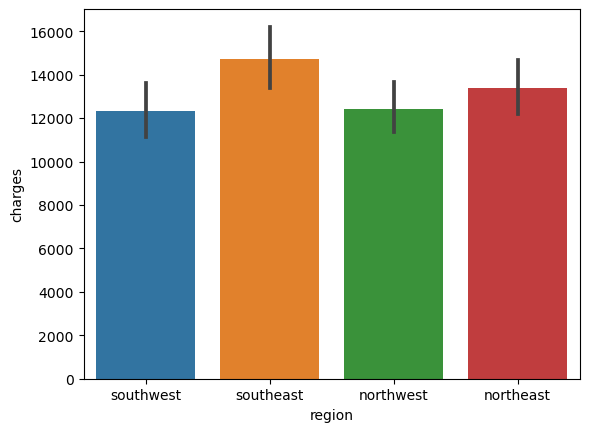

In [107]:
sns.barplot(data = df, x = "region", y = "charges");